In [ ]:
# Import des bibliothèques
import math as m
import numpy as np
import matplotlib.pyplot as plt
from _geometrie_RC4 import *

# Activité 1 : Loi en trapèze
## Calcul du temps de chacune des phases

In [ ]:
# Saisir les caractéristiques nominales 
amax = 5
vmax = .5

!!! question Impléméntation de `calcule_temps(amax :float, vmax :float, distance :float) -> float,float,float`
!!!

In [ ]:
def calcule_temps(amax : float, vmax : float, distance : float) -> (float,float,float) :
    """ 
    Pour une loi en trapèze de vitesse, on calcule : 
       - t1, temps à partir duquel on est à vitesse constante ;
       - t2, temps à partir duquel on décélère ;
       - t3, temps à partir duquel on est à vitesse nulle.
    Entrées : 
     * amax : accélération en m²/s
     * vmax : vitesse en m/s
     * distance : distance à parcourir en mm
    """
    
    t1,t2,t3 = 0,0,0
    return t1, t2, t3

In [ ]:
# Tests personnel
calcule_temps(1,1,1000)

In [ ]:
# Test unitaire (moche :))
assert calcule_temps(1,1,100) == (0.31622776601683794, 0.31622776601683794, 0.6324555320336759) 

In [ ]:
test_q1_01()

Test pour voir si tu es vraiment trop fort !

In [ ]:
test_q1_02()

## Calcul du profil de position, vitesse et accélération pour une loi en trapèze

!!! question Impléméntation de `calcule_les_t(amax :float, vmax :float, distance :float, dt :float) -> [float]`
!!!

In [ ]:
def calcule_les_t(amax,vmax,distance,dt):
    return None

In [ ]:
test_q2()

!!! question Impléméntation de `calcule_les_a(amax :float, vmax :float, distance :float, les_t: [float]) -> [float]`
!!!

??? tip Test
On pourra afficher le résultat en procédant ainsi : 
```
plt.close()
les_t = calcule_les_t(5,0.5,100,0.001)
les_a = calcule_les_a(5,0.5,100,les_t)
plt.plot(les_t,les_a)
plt.grid()
plt.show()
```
Le résultat attendu est le suivant.
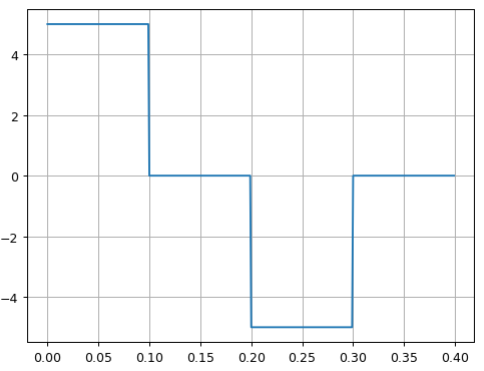
???

In [ ]:
def calcule_les_a(amax :float, vmax :float, distance :float, les_t: [float]) -> [float] :
    
    return None

In [ ]:
plt.close()
les_t = calcule_les_t(5,0.5,100,0.001)
les_a = calcule_les_a(5,0.5,100,les_t)
plt.plot(les_t,les_a)
plt.grid()
plt.show()

In [ ]:
test_q3()

!!! question Impléméntation de `integre(les_t :[float], les_y :[float]) -> [float]`
!!!
??? tip Visualisation de l'intégration des accélérations
```
les_s = integre(les_t,les_a)
plt.close()
plt.plot(les_t,les_s)
plt.grid()
plt.show()
```
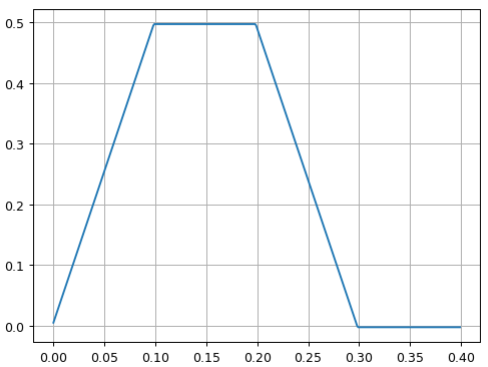
???

In [ ]:
def integre(les_t :[float], les_y :[float]) -> [float] :
    return None

In [ ]:
les_t = calcule_les_t(5,0.5,100,0.001)
les_a = calcule_les_a(5,0.5,100,les_t)
les_s = integre(les_t,les_a)
plt.close()
plt.plot(les_t,les_s)
plt.grid()
plt.show()

In [ ]:
test_q4()

## Tracé des courbes

In [ ]:
plt.close()
les_t = calcule_les_t(5,0.5,100,0.001)
les_a = calcule_les_a(5,0.5,100,les_t)
les_v = integre(les_t,les_a)
les_x = integre(les_t,les_v)

plt.plot(les_t,les_x,label='Position (m)')
plt.plot(les_t,les_v,label='Vitesse (m/s)')
plt.plot(les_t,les_a,label='Accélération (m/s²)')
plt.grid()
plt.legend()
plt.show()
plt.close()

# Activité 2 Détermination de la longueur d'enroulement des câbles
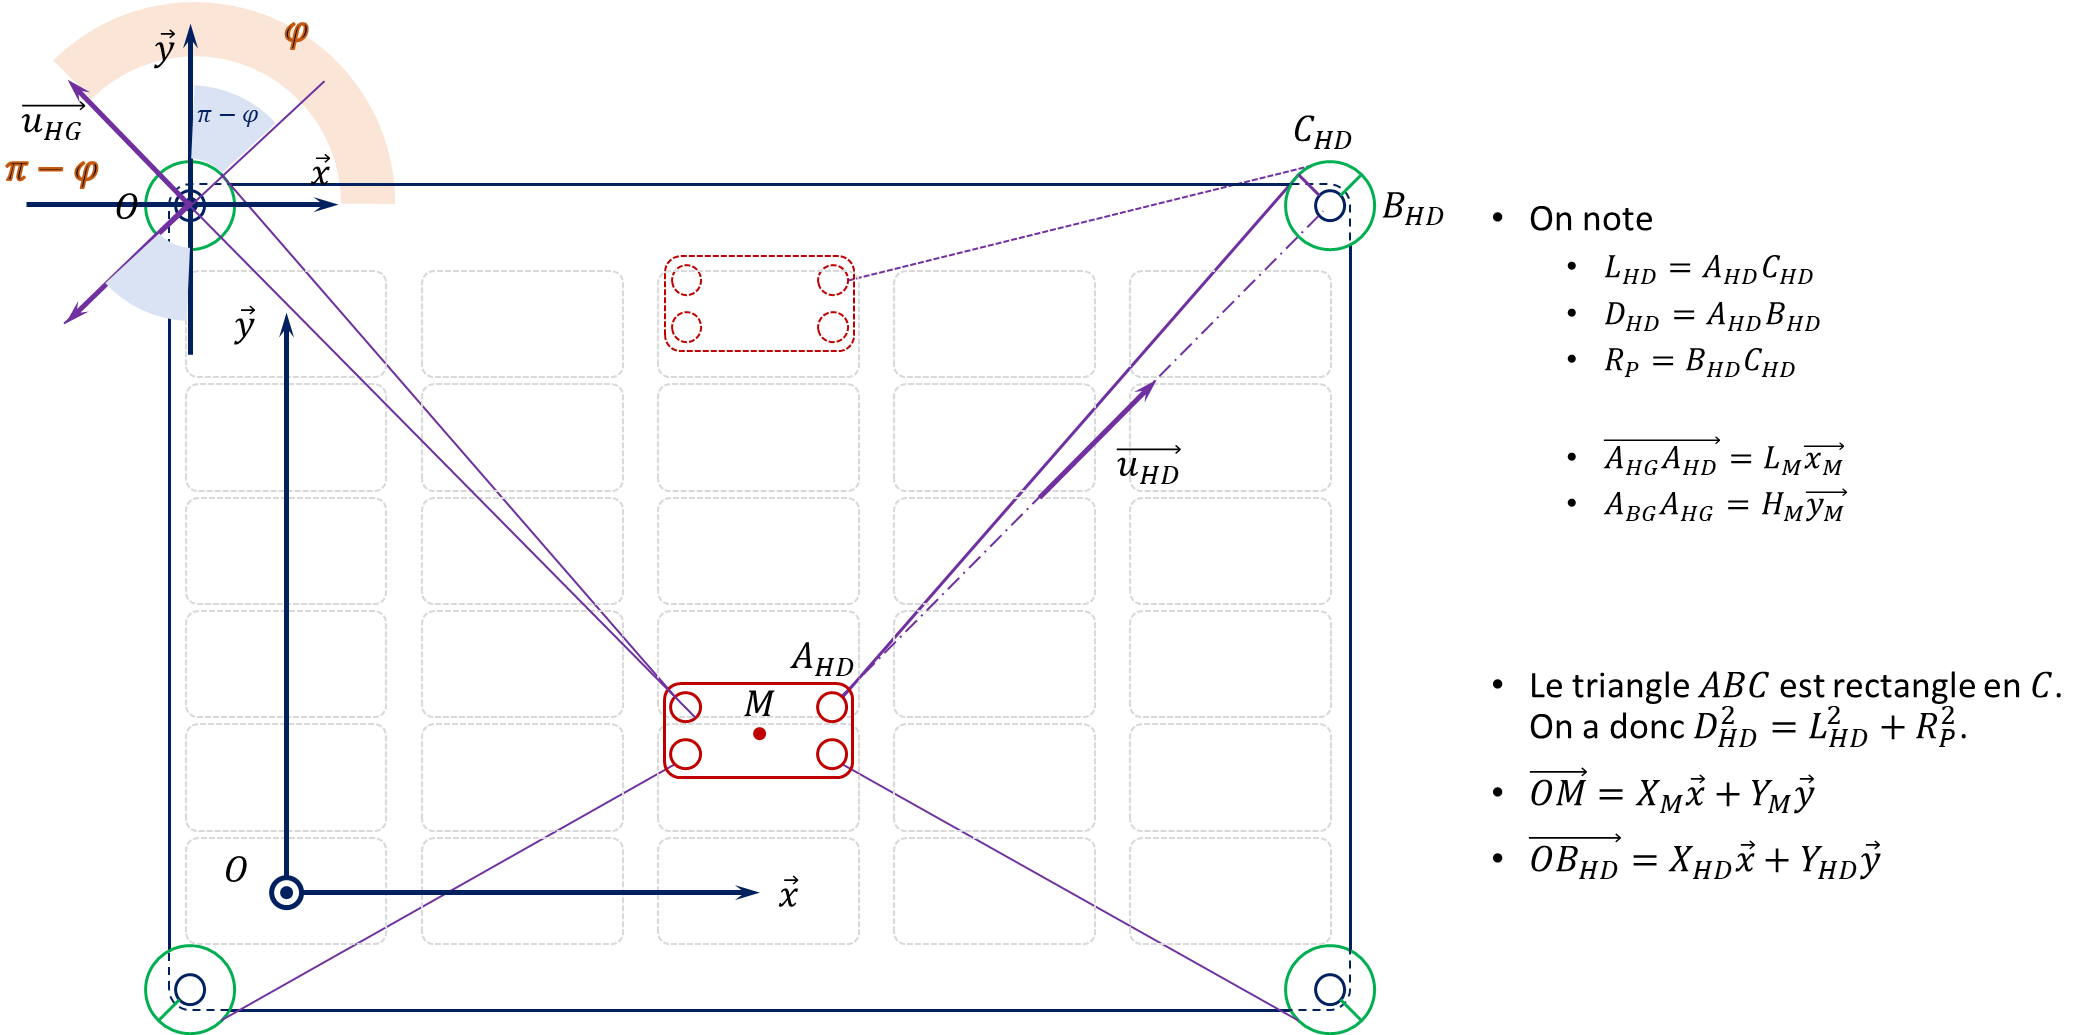

### Détermination de $A_{HD}B_{HD}$ et orientation $\varphi$ du câble.

!!! question 
Implémenter la fonction `calcule_DPhi (H,L,theta,Xm,Xhd,Ym,Yhd) -> float,float` renvoyant $D_{HD}$ et $\varphi_{HD}$.
!!!

In [ ]:
 def calcule_DPhi(H,L,theta,Xm,Xhd,Ym,Yhd):
        """
        Détermination de la distance entre le point d'ancrage et le cebtre de la poulie.
        
        Données du mobile : 
            H : hauteur du mobile (entre deux points d'ancrages de câble)
            L : largeur du mobile (entre deux points d'ancrages de câble)
        Coordonnées du mobile
            Xm,Ym : coordonnées acutelles du centre du mobile
        Coordonnées de la poulie (en haut à droite)
            Xhd,Yhd
            
        """
      
        
        return None,None

In [ ]:
test_q5()

### Longueur d'enroulement

In [ ]:
def get_L_phi(Xm,Ym,theta,poulie):
    """
    Calcul de la distance AB et de l'orientation du câble phi.
    Entrées : 
        * Xm,Ym : coordonnées de M (en mm)
        * Theta : orientation du mobile (en rad)
        * Poulie souhaitée : "HD", "HG", "BD", "BG"
    Sorties :
        * D : longueur AB
        * phi
        * L : longueur d'enrouelment.
    """
    
    H = 50
    L = 100
    Rp = 15
        
    if poulie == "HD" :
        Xhd = 675
        Yhd = 775
        alpha = 0
    if poulie == "BD" :
        Xhd = 675
        Yhd = -175
        H = -H
        alpha = 0
    if poulie == "HG" :
        Xhd = -175
        Yhd = 775
        L = -L
        alpha = m.pi
    if poulie == "BG" :
        H = -H
        L = -L
        Xhd = -175
        Yhd = -175
        alpha = m.pi
        
    D,phi = Dphi(H,L,theta,Xm,Xhd,Ym,Yhd)
    L = (D*D - Rp*Rp)**.5+Rp*abs(alpha-abs(phi))
    return L,D,m.degrees(phi)

# Tracé de la longueur des câbles

In [ ]:
def trajectoire_mobile(xi,yi,xf,yf,amax,vmax):
    """
    Détermination de la trajectoire du mobile dans R0
       (xi,yi) : position initiale
    """
    
    # Distance à parcouir
    dx = xf-xi
    dy = yf-yi
    D = m.sqrt((dx)**2+(dy)**2)
    phi = m.atan2(dy,dx)
    
    # On calcule les lois de trapèze pour le mobile.
    #les_t,les_x,les_v,les_a = calcule_profil(amax,vmax,D)
    les_t = calcule_les_t(amax,vmax,D,0.001)
    les_a = calcule_les_a(amax,vmax,D,les_t)
    les_v = integre(les_t,les_a)
    les_x = integre(les_t,les_v)
    
    
    # On se remet dans la base R0 et en mm
    les_xm = [xi + 1000*x*m.cos(phi) for x in les_x]
    les_ym = [yi + 1000*x*m.sin(phi) for x in les_x]

    return les_t,les_xm,les_ym

# Trajectoire dans l'espace machine

In [ ]:
plt.close()

les_t,les_xm,les_ym = trajectoire_mobile(250,0,250,600,amax,vmax)
plt.plot(les_xm,les_ym,label = "Position mobile")

# Zone de travail 
# A VERIFIER
xt = [-50,550,550,-50,-50]
yt = [-25,-25,625,625,-25]
plt.plot(xt,yt,'r')
plt.show()
plt.legend()
plt.grid()

# Tracé de l'enroulement des câbles

In [ ]:
les_BG = [get_L_phi(les_xm[i],les_ym[i],0,"BG")[1] for i in range(len(les_xm))]
les_BD = [get_L_phi(les_xm[i],les_ym[i],0,"BD")[1] for i in range(len(les_xm))]
les_HG = [get_L_phi(les_xm[i],les_ym[i],0,"HG")[1] for i in range(len(les_xm))]
les_HD = [get_L_phi(les_xm[i],les_ym[i],0,"HD")[1] for i in range(len(les_xm))]

In [ ]:
plt.close()
fig, ax = plt.subplots(nrows=2, ncols=2)#, sharey=True)

# plots
ax[0][0].plot(les_t, les_HG,label="HG")
ax[0][1].plot(les_t, les_HD,label="HD")
ax[1][0].plot(les_t, les_BG,label="BG")
ax[1][1].plot(les_t, les_BD,label="BD")

# labels
# ax[0][0].set_ylabel('f(x)')
# ax[0][0].set_xlabel('x')
# ax[0][1].set_ylabel('g(x)')
# ax[0][1].set_xlabel('x')
ax[0][0].legend()
ax[0][1].legend()
ax[1][0].legend()
ax[1][1].legend()

# Grilles
ax[0][0].grid()
ax[0][1].grid()
ax[1][0].grid()
ax[1][1].grid()


plt.show()


 # Comparaison modèle - réel

In [ ]:
def read_from_rc4(file:str):
    fid = open(file,'r',encoding="ISO-8859-1")
    data = fid.readlines()
    fid.close()
    
    # On cherche le début et la fin des mesures
    i_deb,i_fin = 0,0
    for i in range(len(data)):
        if "MESURES" in data[i]:
            i_deb = i
        if "Param" in data[i]:
            i_fin = i
    
    les_tit = data[i_deb+1].split(";")
    les_uni = data[i_deb+2].split(";")
    # les_col donne le titre des colonnes titre (unités)
    # Fichier de base : index, Temps [ms], Consigne [qc], mesure [qc], consigne vitesse [rpm]
    les_col = [les_tit[i]+" ["+les_uni[i]+"]" for i in range(len(les_tit))]
    i_deb = i_deb + 3
    i_fin = i_fin -2
    
    
    les_index,les_t,les_c1,les_c2,les_c3,les_c4 = [],[],[],[],[],[]
    
    for i in range(i_deb,i_fin+1):
        ligne = data [i]
        ligne = ligne.replace(",",".")
        ligne = ligne.split(";")
        les_index.append(int(ligne[0]))
        les_t.append(float(ligne[1]))
        if ligne[2] != "": les_c1.append(float(ligne[2])) #else : les_c1.append(0)
        les_c2.append(float(ligne[3]))
        les_c3.append(float(ligne[4]))
        les_c4.append(float(ligne[5]))
    return les_index,les_t,les_c1,les_c2,les_c3,les_c4,les_col


def plot_file(file):
    les_index,les_t,les_c1,les_c2,les_c3,les_c4,les_col = read_from_rc4(file)
    
    #plt.plot(les_t,les_c2,label=les_col[3])
    #plt.plot(les_t,les_c3,label=les_col[4])
    plt.plot(les_t,les_c4,label=les_col[5])
    plt.legend()
    
    plt.grid()
    plt.show()
    
def plot_4_mesures(HG:str,HD:str,BG:str,BD:str,qc:bool):
    """
    

    Parameters
    ----------
    HG : str
        fichier de l'enrouleur HG.
    HD : str
        fichier de l'enrouleur HD.
    BG : str
        fichier de l'enrouleur BG.
    BD : str
        fichier de l'enrouleur BD.
    qc : bool
        DESCRIPTION.

    Returns
    -------
    None.

    """
    les_index_hg,les_t_hg,les_c1_hg,les_c2_hg,les_c3_hg,les_c4_hg,les_col_hg = read_from_rc4(HG)
    les_index_hd,les_t_hd,les_c1_hd,les_c2_hd,les_c3_hd,les_c4_hd,les_col_hd = read_from_rc4(HD)
    les_index_bg,les_t_bg,les_c1_bg,les_c2_bg,les_c3_bg,les_c4_bg,les_col_bg = read_from_rc4(BG)
    les_index_bd,les_t_bd,les_c1_bd,les_c2_bd,les_c3_bd,les_c4_bd,les_col_bd = read_from_rc4(BD)
    
    """
    if not qc :
        les_c2_hg = [e/52 for e in les_c2_hg]
        les_c3_hg = [e/52 for e in les_c3_hg]
        les_c2_hd = [e/52 for e in les_c2_hd]
        les_c3_hd = [e/52 for e in les_c3_hd]
        les_c2_bg = [e/52 for e in les_c2_bg]
        les_c3_bg = [e/52 for e in les_c3_bg]
        les_c2_bd = [e/52 for e in les_c2_bd]
        les_c3_bd = [e/52 for e in les_c3_bd]
        les_col_hg[3] = les_col_hg[3].replace("qc","mm")
        les_col_hg[4] = les_col_hg[4].replace("qc","mm")
        les_col_hd[3] = les_col_hd[3].replace("qc","mm")
        les_col_hd[4] = les_col_hd[4].replace("qc","mm")
        les_col_bg[3] = les_col_bg[3].replace("qc","mm")
        les_col_bg[4] = les_col_bg[4].replace("qc","mm")
        les_col_bd[3] = les_col_bd[3].replace("qc","mm")
        les_col_bd[4] = les_col_bd[4].replace("qc","mm")
    """
    
    fig, ax = plt.subplots(nrows=2, ncols=2)#, sharey=True)
    
    # plots
    ax[0][0].plot(les_t_hg, les_c2_hg,label=les_col_hg[3])
    ax[0][0].plot(les_t_hg, les_c3_hg,label=les_col_hg[4])
    
    ax[0][1].plot(les_t_hd, les_c2_hd,label=les_col_hd[3])
    ax[0][1].plot(les_t_hd, les_c3_hd,label=les_col_hd[4])
    
    ax[1][0].plot(les_t_bg, les_c2_bg,label=les_col_bg[3])
    ax[1][0].plot(les_t_bg, les_c3_bg,label=les_col_bg[4])
    
    ax[1][1].plot(les_t_bd, les_c2_bd,label=les_col_bd[3])
    ax[1][1].plot(les_t_bd, les_c3_bd,label=les_col_bd[4])
    
    # labels
    # ax[0][0].set_ylabel('f(x)')
    # ax[0][0].set_xlabel('x')
    # ax[0][1].set_ylabel('g(x)')
    # ax[0][1].set_xlabel('x')
    ax[0][0].legend()
    ax[0][1].legend()
    ax[1][0].legend()
    ax[1][1].legend()
    
    # Grilles
    ax[0][0].grid()
    ax[0][1].grid()
    ax[1][0].grid()
    ax[1][1].grid()
    
    # adjust right subfigure axes location
    # ax[0][1].yaxis.tick_right()
    # ax[0][1].yaxis.set_label_position("right")
    
    # figure settings
    #fig.suptitle('These are some functions', fontsize=16)
    #fig.tight_layout()
    #fig.subplots_adjust(top=0.85) # tight_layout ignores overall titles (current bug
    plt.show()
    plt.close()


In [ ]:
qc_mm = 2*m.pi*25/8192/18 ## Conversion de qc en mm
                          ## [mm] = qc_mm x [qc]

In [ ]:

file_hg = "01_HG.csv"
file_hd = "01_HD.csv"
file_bg = "01_BG.csv"
file_bd = "01_BD.csv"



les_index_hg,les_t_hg,les_c1_hg,les_c2_hg,les_c3_hg,les_c4_hg,les_col_hg = read_from_rc4(file_hg)
les_index_hd,les_t_hd,les_c1_hd,les_c2_hd,les_c3_hd,les_c4_hd,les_col_hd = read_from_rc4(file_hd)
les_index_bg,les_t_bg,les_c1_bg,les_c2_bg,les_c3_bg,les_c4_bg,les_col_bg = read_from_rc4(file_bg)
les_index_bd,les_t_bd,les_c1_bd,les_c2_bd,les_c3_bd,les_c4_bd,les_col_bd = read_from_rc4(file_bd)

### SI LES VALEURS Sont en QC
if True : ###
    les_c2_hg = [e*qc_mm for e in les_c2_hg]
    les_c3_hg = [e*qc_mm for e in les_c3_hg]
    les_c2_hd = [e*qc_mm for e in les_c2_hd]
    les_c3_hd = [e*qc_mm for e in les_c3_hd]
    les_c2_bg = [e*qc_mm for e in les_c2_bg]
    les_c3_bg = [e*qc_mm for e in les_c3_bg]
    les_c2_bd = [e*qc_mm for e in les_c2_bd]
    les_c3_bd = [e*qc_mm for e in les_c3_bd]
    les_col_hg[3] = les_col_hg[3].replace("qc","mm")
    les_col_hg[4] = les_col_hg[4].replace("qc","mm")
    les_col_hd[3] = les_col_hd[3].replace("qc","mm")
    les_col_hd[4] = les_col_hd[4].replace("qc","mm")
    les_col_bg[3] = les_col_bg[3].replace("qc","mm")
    les_col_bg[4] = les_col_bg[4].replace("qc","mm")
    les_col_bd[3] = les_col_bd[3].replace("qc","mm")
    les_col_bd[4] = les_col_bd[4].replace("qc","mm")

fig, ax = plt.subplots(nrows=2, ncols=2)#, sharey=True)

# plots
ax[0][0].plot(les_t_hg, les_c2_hg,".",label=les_col_hg[3])
ax[0][0].plot(les_t_hg, les_c3_hg,".",label=les_col_hg[4])

ax[0][1].plot(les_t_hd, les_c2_hd,".",label=les_col_hd[3])
ax[0][1].plot(les_t_hd, les_c3_hd,".",label=les_col_hd[4])

ax[1][0].plot(les_t_bg, les_c2_bg,".",label=les_col_bg[3])
ax[1][0].plot(les_t_bg, les_c3_bg,".",label=les_col_bg[4])

ax[1][1].plot(les_t_bd, les_c2_bd,".",label=les_col_bd[3])
ax[1][1].plot(les_t_bd, les_c3_bd,".",label=les_col_bd[4])

# Affichage du modèle avec temps en ms
ax[0][0].plot([tt*1000 for tt in les_t], les_HG,label="HG - Modele")
ax[0][1].plot([tt*1000 for tt in les_t], les_HD,label="HD - Modele")
ax[1][0].plot([tt*1000 for tt in les_t], les_BG,label="BG - Modele")
ax[1][1].plot([tt*1000 for tt in les_t], les_BD,label="BD - Modele")

# labels
# ax[0][0].set_ylabel('f(x)')
# ax[0][0].set_xlabel('x')
# ax[0][1].set_ylabel('g(x)')
# ax[0][1].set_xlabel('x')
ax[0][0].legend()
ax[0][1].legend()
ax[1][0].legend()
ax[1][1].legend()

# Grilles
ax[0][0].grid()
ax[0][1].grid()
ax[1][0].grid()
ax[1][1].grid()

# adjust right subfigure axes location
# ax[0][1].yaxis.tick_right()
# ax[0][1].yaxis.set_label_position("right")

# figure settings
#fig.suptitle('These are some functions', fontsize=16)
#fig.tight_layout()
#fig.subplots_adjust(top=0.85) # tight_layout ignores overall titles (current bug
plt.show()
plt.close()


## Identification du comportement cinématique. 
### Détermination de la vitesse des câbles. 

In [ ]:
def calc_vitesse_modele(les_t,HG,HD,BG,BD):
    vHG,vHD,vBG,vBD = [],[],[],[]
    for i in range(len(les_t)-1):
        vHG.append((HG[i+1]-HG[i])/(les_t[i+1]-les_t[i]))
        vHD.append((HD[i+1]-HD[i])/(les_t[i+1]-les_t[i]))
        vBG.append((BG[i+1]-BG[i])/(les_t[i+1]-les_t[i]))
        vBD.append((BD[i+1]-BD[i])/(les_t[i+1]-les_t[i]))
    vHG.append(vHG[-1])
    vHD.append(vHD[-1])
    vBG.append(vBG[-1])
    vBD.append(vBD[-1])
    return vHG,vHD,vBG,vBD

In [ ]:
les_vHG,les_vHD,les_vBG,les_vBD = calc_vitesse_modele(les_t,les_HG,les_HD,les_BG,les_BD)

In [ ]:

plt.close()
fig, ax = plt.subplots(nrows=2, ncols=2)#, sharey=True)

# plots
ax[0][0].plot([tt*1000 for tt in les_t], les_vHG,label="HG")
ax[0][0].plot(les_t_hg, [vv*60/2/m.pi/18*25 for vv in les_c4_hg],label="HG_m")

ax[0][1].plot([tt*1000 for tt in les_t], les_vHD,label="HD")
ax[0][1].plot(les_t_hd, les_c4_hd,label="HD_m")

ax[1][0].plot([tt*1000 for tt in les_t], les_vBG,label="BG")
ax[1][0].plot(les_t_bg, les_c4_bg,label="BG_m")

ax[1][1].plot([tt*1000 for tt in les_t], les_vBD,label="BD")
ax[1][1].plot(les_t_bd, les_c4_bd,label="BD_m")

# labels
# ax[0][0].set_ylabel('f(x)')
# ax[0][0].set_xlabel('x')
# ax[0][1].set_ylabel('g(x)')
# ax[0][1].set_xlabel('x')
ax[0][0].legend()
ax[0][1].legend()
ax[1][0].legend()
ax[1][1].legend()

# Grilles
ax[0][0].grid()
ax[0][1].grid()
ax[1][0].grid()
ax[1][1].grid()


plt.show()
plt.close()

In [ ]:
plt.close()
fig, ax = plt.subplots(nrows=2, ncols=2)#, sharey=True)

# plots
ax[0][0].plot(les_t_hg, les_c4_hg,label="HG")
ax[0][1].plot(les_index_hd, les_c4_hd,label="HD")
ax[1][0].plot(les_index_bg, les_c4_bg,label="BG")
ax[1][1].plot(les_index_bd, les_c4_bd,label="BD")

# labels
# ax[0][0].set_ylabel('f(x)')
# ax[0][0].set_xlabel('x')
# ax[0][1].set_ylabel('g(x)')
# ax[0][1].set_xlabel('x')
ax[0][0].legend()
ax[0][1].legend()
ax[1][0].legend()
ax[1][1].legend()

# Grilles
ax[0][0].grid()
ax[0][1].grid()
ax[1][0].grid()
ax[1][1].grid()


plt.show()
plt.close()